<a href="https://colab.research.google.com/github/hydmic009/CS3001F-A1/blob/main/modAl_AL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Preparing metadata (setup.py) ... done


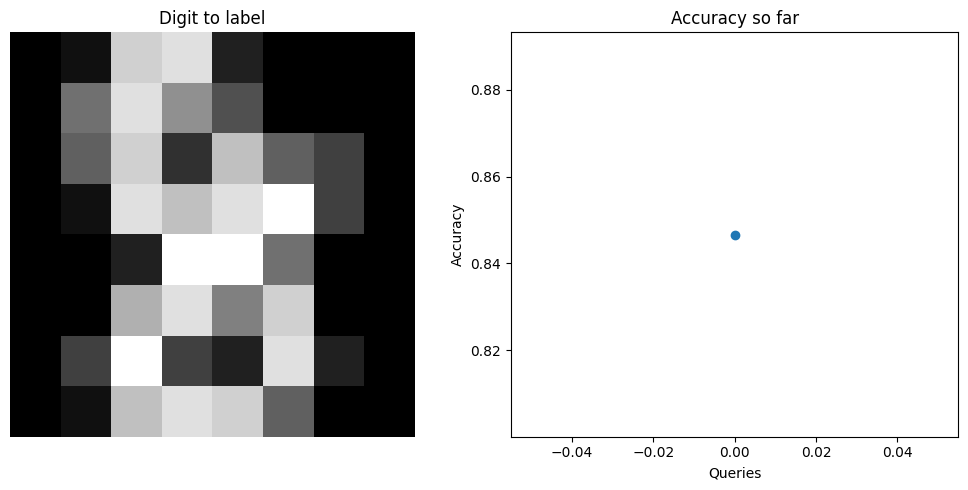


Which digit is this? 8


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


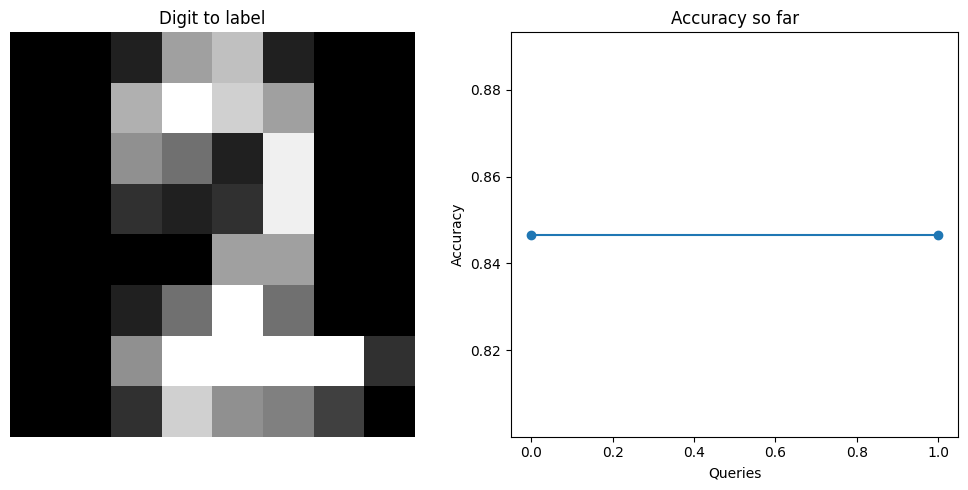


Which digit is this? 2


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


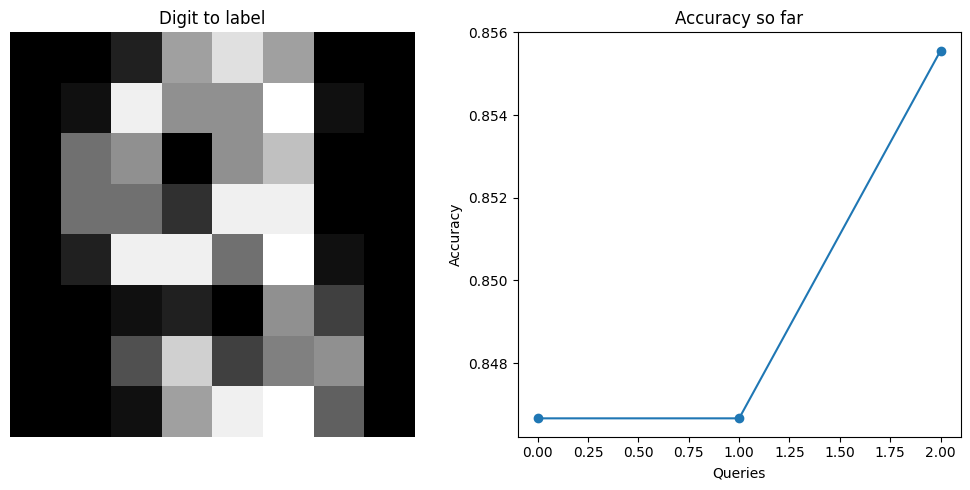


Which digit is this? 8


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


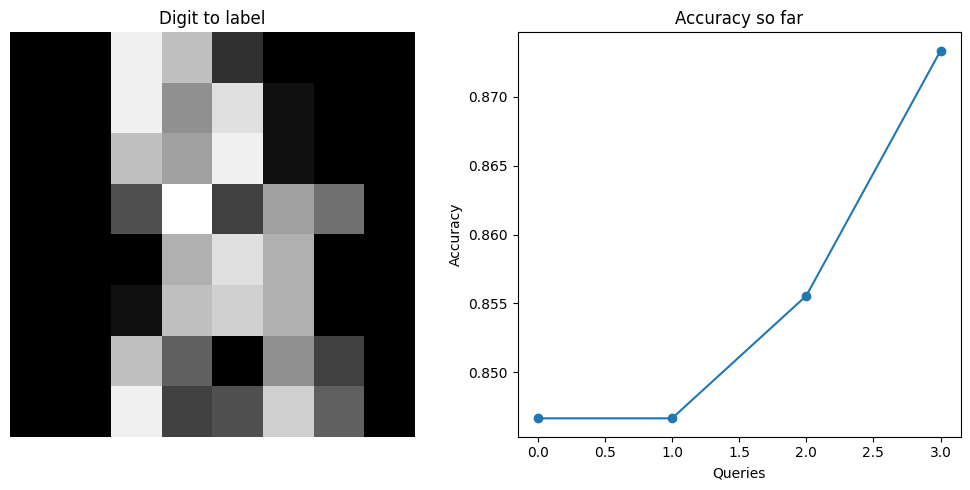


Which digit is this? 3


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


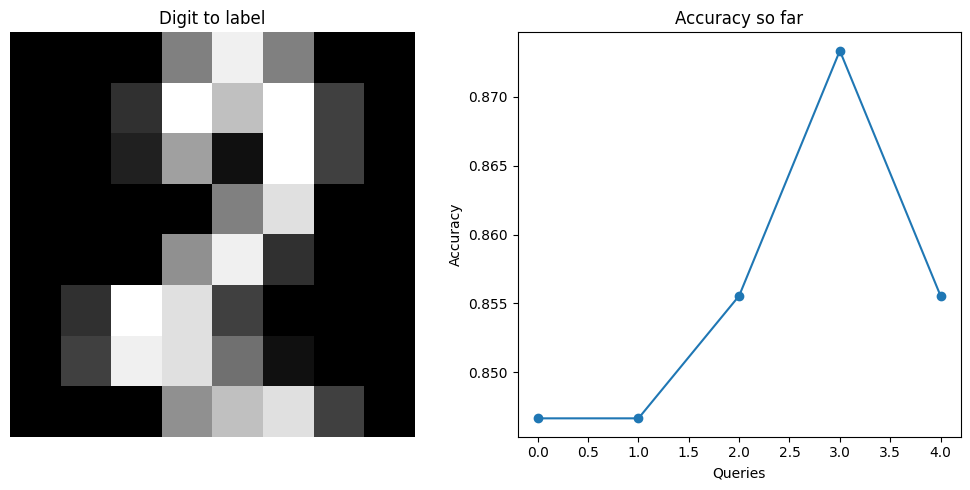


Which digit is this? 2


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


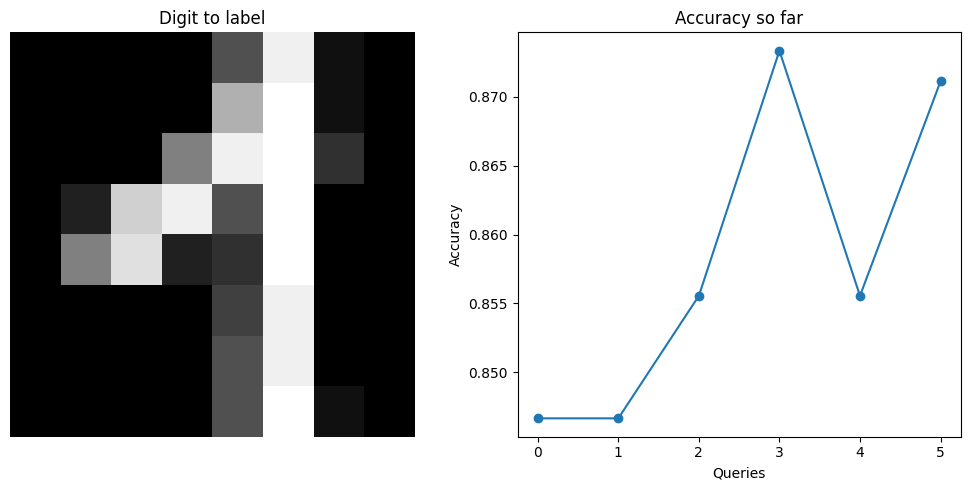


Which digit is this? 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


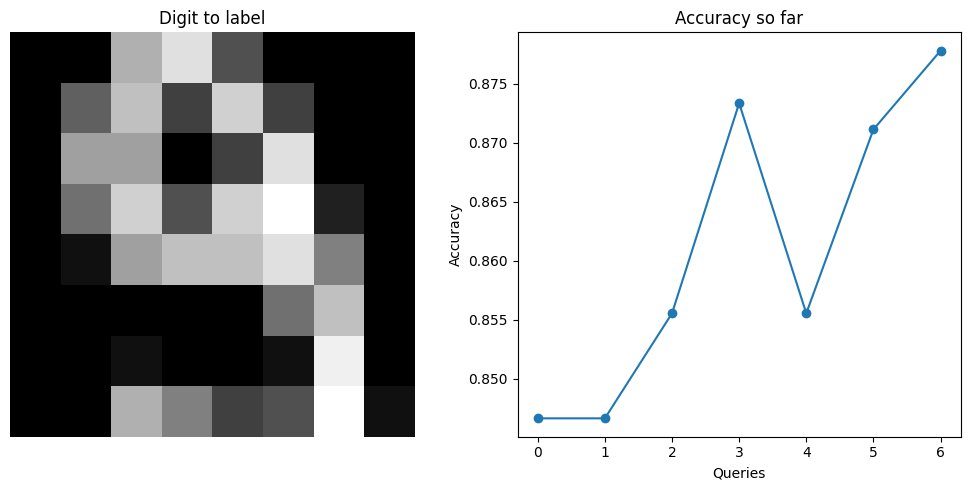


Which digit is this? 9


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


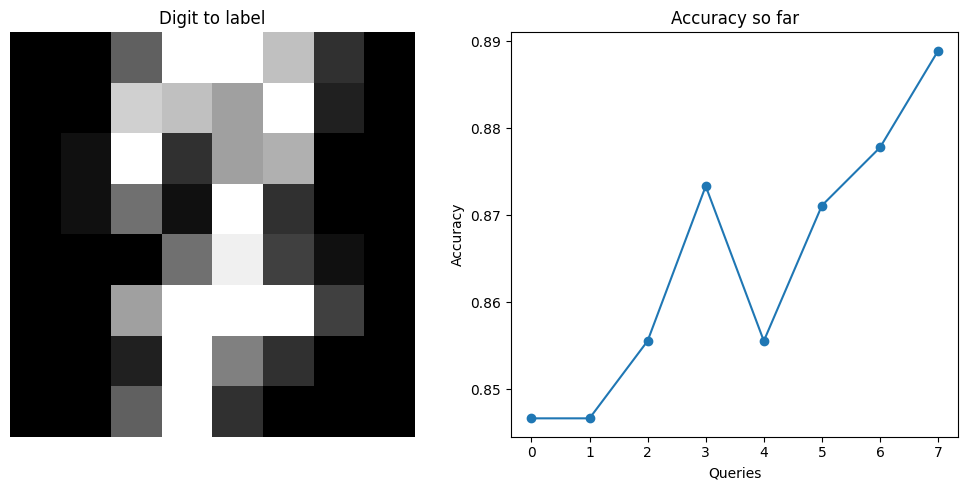


Which digit is this? 7


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


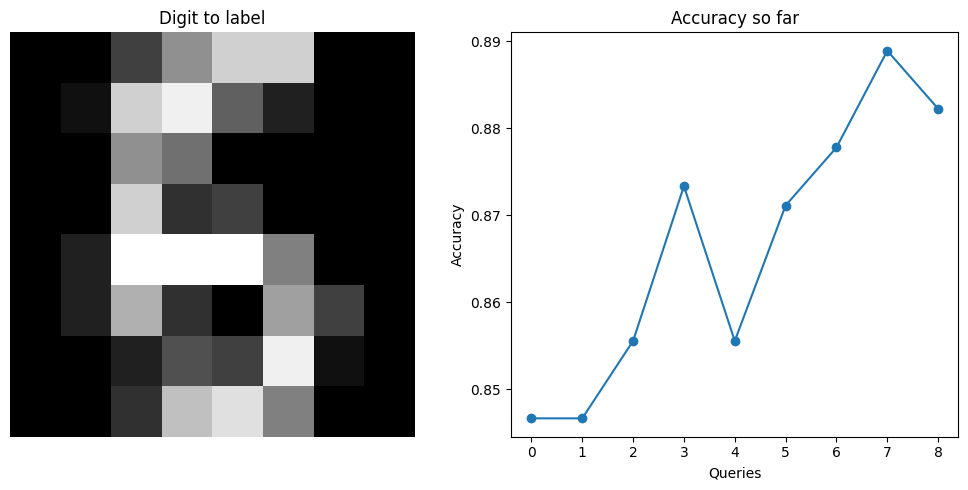


Which digit is this? 5


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


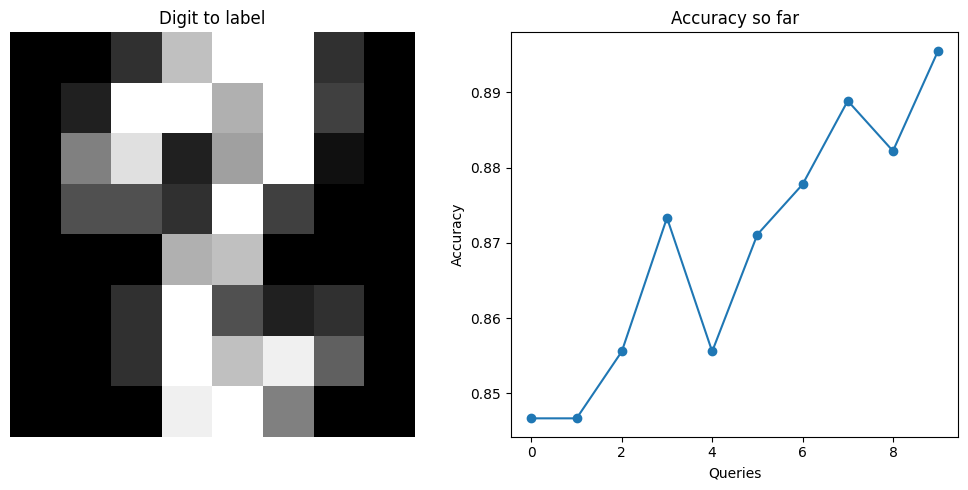

In [ ]:
# Interactive labeling with Jupyter

# 1. Install modAL directly from GitHub (avoids PyPI name collision)
!pip install -q git+https://github.com/modAL-python/modAL.git

import sys
import numpy as np
from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from matplotlib import pyplot as plt
%matplotlib inline

# Use default matplotlib style
plt.style.use('default')

# 2. Load and prepare the dataset
n_initial = 100
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Pick initial labeled points
initial_idx = np.random.choice(len(X_train), n_initial, replace=False)
X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]

# The pool of unlabeled data
X_pool = np.delete(X_train, initial_idx, axis=0)
y_pool = np.delete(y_train, initial_idx, axis=0)

# 3. Initialize the ActiveLearner
learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial,
    y_training=y_initial
)

# 4. Active learning loop
n_queries = 20
accuracy_scores = [learner.score(X_test, y_test)]

for i in range(n_queries):
    # Ask the learner for the next instance to label
    query_idx, query_inst = learner.query(X_pool)

    # Plot the instance (left) and accuracy curve (right)
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Digit to label')
    plt.imshow(query_inst.reshape(8, 8), cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Accuracy so far')
    plt.plot(range(i+1), accuracy_scores, marker='o')
    plt.xlabel('Queries')
    plt.ylabel('Accuracy')

    plt.tight_layout()
    plt.show()

    # Ensure the prompt is visible
    print()
    sys.stdout.flush()

    # Prompt the user for the label
    y_new = int(input("Which digit is this? "))

    # Teach the new label to the learner
    learner.teach(query_inst.reshape(1, -1), np.array([y_new]))

    # Remove the queried instance from the pool
    X_pool = np.delete(X_pool, query_idx, axis=0)
    y_pool = np.delete(y_pool, query_idx, axis=0)

    # Record updated accuracy
    accuracy_scores.append(learner.score(X_test, y_test))

# 5. Plot final accuracy curve
plt.figure(figsize=(8, 4))
plt.title('Final Classification Accuracy')
plt.plot(range(n_queries+1), accuracy_scores, marker='o')
plt.xlabel('Number of queries')
plt.ylabel('Accuracy')
plt.show()
